# Car Fuel Efficiency - Homework

This notebook is a personal practice version of a car fuel efficiency prediction project via regression.
The goal is to explore, preprocess, and model car fuel efficiency using Python and machine learning techniques.  

**Author:** Tatiana León

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

Load the raw dataset into a pandas DataFrame for processing.x

In [2]:
data_carfuel = 'wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'
#!wget $data_carfuel -O car_fuel_efficiency.csv

In [3]:
df = pd.read_csv('car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


As part of the homework we will be only using the next variables.

In [4]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [5]:
#Let's do a little bit of cleaning in the columns so it is easier to read them
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [6]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,europe,gasoline,all-wheel_drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,usa,gasoline,front-wheel_drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,europe,gasoline,front-wheel_drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,usa,diesel,all-wheel_drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,europe,gasoline,all-wheel_drive,2.0,12.488369


In [7]:
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]

In [8]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


### Exploratory data analysis
- Run quick EDA to inspect schema, types, and basic statistics.
- Create plots for EDA or diagnostics (e.g., residuals, feature effects).

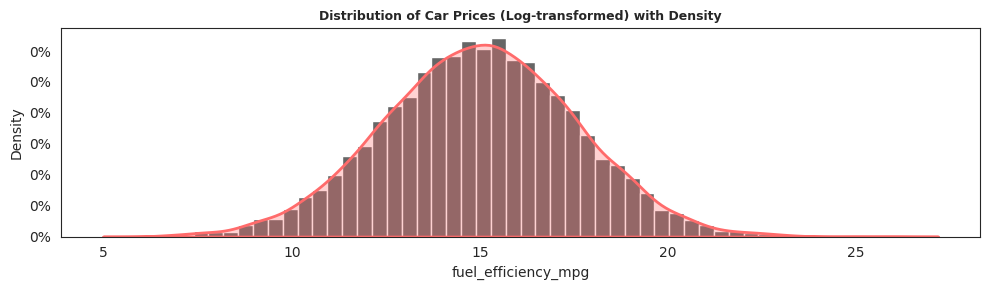

In [9]:
plt.figure(figsize=(10,3))
sns.set_style("white")

sns.histplot(df.fuel_efficiency_mpg, bins=50, color='black', alpha=0.6, stat='density', edgecolor='white')
sns.kdeplot(df.fuel_efficiency_mpg, color='#FF6B6B', linewidth=2, fill=True, alpha=0.3) #overlay density curve
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))
plt.xlabel('fuel_efficiency_mpg')
plt.ylabel('Density')
plt.title('Distribution of Car Prices (Log-transformed) with Density', fontsize=9, weight='bold')

plt.tight_layout()
plt.show()

In [10]:
df.describe().round(2)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.00,8996.00,9704.00,9704.00,9704.00
mean,199.71,149.66,3001.28,2011.48,14.99
std,49.46,29.88,497.89,6.66,2.56
min,10.00,37.00,952.68,2000.00,6.20
25%,170.00,130.00,2666.25,2006.00,13.27
50%,200.00,149.00,2993.23,2012.00,15.01
75%,230.00,170.00,3334.96,2017.00,16.71
max,380.00,271.00,4739.08,2023.00,25.97


Prepare data set for machine learning.

In [11]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test) 

In [ ]:
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train_orig = df_train.fuel_efficiency_mpg.values
y_val_orig = df_val.fuel_efficiency_mpg.values
y_test_orig = df_test.fuel_efficiency_mpg.values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)        
y_test = np.log1p(y_test_orig)

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [13]:

import io
import sys
import math
import json
import numpy as np
import pandas as pd

from urllib.request import urlopen
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

URL = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"

USE_COLS = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg',
]

def load_data():
    df = pd.read_csv(URL)
    df = df[USE_COLS].copy()
    return df

def is_long_tailed(series):
    # Heuristic: long tail if mean >> median (e.g., > 20% higher)
    s = series.dropna()
    mean = s.mean()
    median = s.median()
    return mean > 1.2 * median, mean, median

def split_data(df, seed=42):
    n = len(df)
    idx = np.arange(n)
    rng = np.random.default_rng(seed)
    rng.shuffle(idx)
    n_train = int(0.6 * n)
    n_val = int(0.2 * n)
    train_idx = idx[:n_train]
    val_idx = idx[n_train:n_train+n_val]
    test_idx = idx[n_train+n_val:]
    return df.iloc[train_idx].copy(), df.iloc[val_idx].copy(), df.iloc[test_idx].copy()

def rmse(y_true, y_pred):
    return math.sqrt(mean_squared_error(y_true, y_pred))

def prepare_X(df):
    # Standard Zoomcamp-style: no one-hot here, just numerical columns
    return df[['engine_displacement','horsepower','vehicle_weight','model_year']].values

def train_eval_linear(train_df, val_df, fill_strategy="zero", mean_values=None, r=0.0):
    # Fill missing values
    features = ['engine_displacement','horsepower','vehicle_weight','model_year']
    tr = train_df.copy()
    va = val_df.copy()

    if fill_strategy == "zero":
        tr[features] = tr[features].fillna(0.0)
        va[features] = va[features].fillna(0.0)
    elif fill_strategy == "mean":
        assert mean_values is not None, "mean_values required for fill_strategy='mean'"
        for c in features:
            tr[c] = tr[c].fillna(mean_values[c])
            va[c] = va[c].fillna(mean_values[c])
    else:
        raise ValueError("Unknown fill strategy")

    X_train = prepare_X(tr)
    y_train = tr['fuel_efficiency_mpg'].values

    X_val = prepare_X(va)
    y_val = va['fuel_efficiency_mpg'].values

    if r == 0.0:
        model = LinearRegression()
    else:
        model = Ridge(alpha=r, random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    return rmse(y_val, y_pred)

def closest_option(value, options):
    # Returns the option string with minimal absolute difference to value
    best = None
    best_diff = float("inf")
    for opt in options:
        diff = abs(value - opt)
        if diff < best_diff:
            best = opt
            best_diff = diff
    return best

def main():
    df = load_data()

    # EDA: Long tail?
    long_tail, mean_mpg, median_mpg = is_long_tailed(df['fuel_efficiency_mpg'])
    print("EDA — fuel_efficiency_mpg long tail? ", long_tail, f"(mean={mean_mpg:.3f}, median={median_mpg:.3f})")

    # Q1: Which column has missing values?
    na_counts = df.isna().sum().sort_values(ascending=False)
    q1_col = na_counts.index[0] if na_counts.iloc[0] > 0 else None
    print("Q1 — Column with missing values:", q1_col)

    # Q2: Median horsepower
    hp_median = float(df['horsepower'].median())
    q2_options = [49, 99, 149, 199]
    q2_pick = closest_option(hp_median, q2_options)
    print(f"Q2 — horsepower median = {hp_median:.3f} → closest option: {q2_pick}")

    # Prepare/split
    train_df, val_df, test_df = split_data(df, seed=42)

    # Q3: Fill with 0 vs mean (mean computed on TRAIN only)
    features = ['engine_displacement','horsepower','vehicle_weight','model_year']
    means = train_df[features].mean(numeric_only=True).to_dict()

    rmse_zero = train_eval_linear(train_df, val_df, fill_strategy="zero", r=0.0)
    rmse_mean = train_eval_linear(train_df, val_df, fill_strategy="mean", mean_values=means, r=0.0)
    print(f"Q3 — RMSE (fill=0)  : {rmse_zero:.4f} → rounded {round(rmse_zero,2)}")
    print(f"Q3 — RMSE (fill=mean): {rmse_mean:.4f} → rounded {round(rmse_mean,2)}")
    if round(rmse_zero,2) < round(rmse_mean,2):
        q3_pick = "With 0"
    elif round(rmse_zero,2) > round(rmse_mean,2):
        q3_pick = "With mean"
    else:
        q3_pick = "Both are equally good"
    print("Q3 — Best option:", q3_pick)

    # Q4: Regularized LR (Ridge) with fill=0 and r in list; choose smallest r in case of tie (by rounded RMSE)
    r_list = [0, 0.01, 0.1, 1, 5, 10, 100]
    scores = []
    for r in r_list:
        score = train_eval_linear(train_df, val_df, fill_strategy="zero", r=r)
        scores.append(score)
        print(f"Q4 — r={r:<6}  RMSE={score:.4f} → rounded {round(score,2)}")
    # pick best by rounded score, tie → smallest r
    rounded = [round(s,2) for s in scores]
    best_round = min(rounded)
    candidates = [r for r, rr in zip(r_list, rounded) if rr == best_round]
    q4_pick = min(candidates)
    print("Q4 — Best r by rounded RMSE:", q4_pick)

    # Q5: Seed stability: seeds 0..9; split 60/20/20, fill=0, OLS; collect val RMSE; std of scores
    seed_scores = []
    for sd in range(10):
        tr, va, te = split_data(df, seed=sd)
        s = train_eval_linear(tr, va, fill_strategy="zero", r=0.0)
        seed_scores.append(s)
        print(f"Q5 — seed={sd}  val_RMSE={s:.5f}")
    std = float(np.std(seed_scores))
    std_rounded = round(std, 3)
    print(f"Q5 — std of RMSE over seeds = {std:.6f} → rounded {std_rounded}")
    # closest option among given
    q5_pick = min([0.001, 0.006, 0.060, 0.600], key=lambda x: abs(x-std_rounded))
    print("Q5 — Closest option:", q5_pick)

    # Q6: seed=9; combine train+val; fill=0; train Ridge with r=0.001; test RMSE
    tr, va, te = split_data(df, seed=9)
    tr_full = pd.concat([tr, va], ignore_index=True)
    # train on tr_full, eval on test
    def train_on_trfull_eval_on_test(tr_full, test_df, r=0.001):
        feats = ['engine_displacement','horsepower','vehicle_weight','model_year']
        trf = tr_full.copy()
        tef = test_df.copy()
        trf[feats] = trf[feats].fillna(0.0)
        tef[feats] = tef[feats].fillna(0.0)
        X_tr = trf[feats].values
        y_tr = trf['fuel_efficiency_mpg'].values
        X_te = tef[feats].values
        y_te = tef['fuel_efficiency_mpg'].values
        model = Ridge(alpha=r, random_state=42)
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_te)
        return rmse(y_te, y_pred)
    test_rmse = train_on_trfull_eval_on_test(tr_full, te, r=0.001)
    test_rmse_round = round(test_rmse, 3)
    print(f"Q6 — test RMSE (seed=9, r=0.001) = {test_rmse:.6f} → rounded {test_rmse_round}")
    # closest option among [0.15, 0.515, 5.15, 51.5]
    q6_pick = min([0.15, 0.515, 5.15, 51.5], key=lambda x: abs(x-test_rmse_round))
    print("Q6 — Closest option:", q6_pick)

if __name__ == "__main__":
    main()


EDA — fuel_efficiency_mpg long tail?  False (mean=14.985, median=15.006)
Q1 — Column with missing values: horsepower
Q2 — horsepower median = 149.000 → closest option: 149
Q3 — RMSE (fill=0)  : 0.5217 → rounded 0.52
Q3 — RMSE (fill=mean): 0.4665 → rounded 0.47
Q3 — Best option: With mean
Q4 — r=0       RMSE=0.5217 → rounded 0.52
Q4 — r=0.01    RMSE=0.5217 → rounded 0.52
Q4 — r=0.1     RMSE=0.5217 → rounded 0.52
Q4 — r=1       RMSE=0.5217 → rounded 0.52
Q4 — r=5       RMSE=0.5217 → rounded 0.52
Q4 — r=10      RMSE=0.5217 → rounded 0.52
Q4 — r=100     RMSE=0.5217 → rounded 0.52
Q4 — Best r by rounded RMSE: 0
Q5 — seed=0  val_RMSE=0.52100
Q5 — seed=1  val_RMSE=0.52440
Q5 — seed=2  val_RMSE=0.52519
Q5 — seed=3  val_RMSE=0.52438
Q5 — seed=4  val_RMSE=0.52590
Q5 — seed=5  val_RMSE=0.52523
Q5 — seed=6  val_RMSE=0.52045
Q5 — seed=7  val_RMSE=0.51039
Q5 — seed=8  val_RMSE=0.52039
Q5 — seed=9  val_RMSE=0.53230
Q5 — std of RMSE over seeds = 0.005337 → rounded 0.005
Q5 — Closest option: 0.006
Q6 —